In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pandas import Series, DataFrame

In [16]:
import matplotlib as mlt

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
'''
Kaggle provides a great dataset for its Titanic competition. I have downloaded that dataset 
and will add it to this Jupyter notebook for playing around with.
'''

'\nKaggle provides a great dataset for its Titanic competition. I have downloaded that dataset \nand will add it to this Jupyter notebook for playing around with.\n'

In [8]:
titanicDataFrame = pd.read_csv("train.csv")

In [9]:
# Next, I will check what all is in there.

In [10]:
titanicDataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanicDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
titanicDataFrame.columns # … to check to see if there are any spaces in the column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
'''
Practice questions are a good starting point for getting the hang of general data analysis. 
Answers that may be possible to obtain from the column category data available in this dataset are:

1) Who were these passengers? As in, what were common passenger demographic profiles on the Titanic’s maiden voyage?

2) How were the passengers distributed? And, did the deck they were on always show their Pclass?

3) Where did they embark?

4) Which passengers were traveling alone and which were traveling with family?

5) Are there any correlations between survival and other data point?

'''

'\nPractice questions are a good starting point for getting the hang of general data analysis. \nAnswers that may be possible to obtain from the column category data available in this dataset are:\n\n1) Who were these passengers? As in, what were common passenger demographic profiles on the Titanic’s maiden voyage?\n\n2) How were the passengers distributed? And, did the deck they were on always show their Pclass?\n\n3) Where did they embark?\n\n4) Which passengers were traveling alone and which were traveling with family?\n\n5) Are there any correlations between survival and other data point?\n\n'

In [14]:
'''
Question #1 is who were these passengers? I can begin trying to answer that question 
by calling seaborn (sns) for creating a factor plot to check gender.

'''

'\nQuestion #1 is who were these passengers? I can begin trying to answer that question \nby calling seaborn (sns) for creating a factor plot to check gender.\n\n'

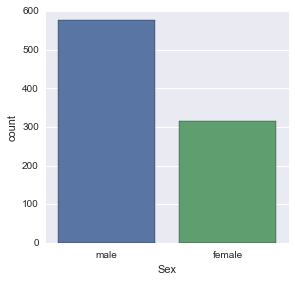

In [29]:
sns.factorplot("Sex", kind ="count", data=titanicDataFrame)

In [30]:
'''
The above passes “Sex” as a column argument and indicates that the data is coming from the 
Titanic DataFrame that was created earlier. Kind is needed to indicate the kind of plot to draw.
'''

'\nThe above passes “Sex” as a column argument and indicates that the data is coming from the \nTitanic DataFrame that was created earlier. Kind is needed to indicate the kind of plot to draw.\n'

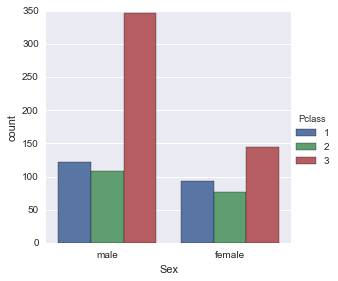

In [34]:
sns.factorplot("Sex", kind ="count", data=titanicDataFrame, hue="Pclass") # ... separates genders by passenger class.

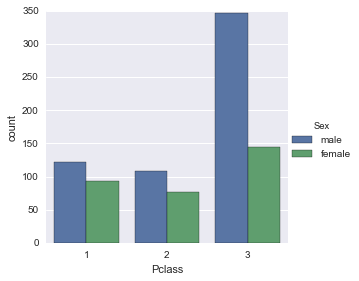

In [35]:
sns.factorplot("Pclass", kind ="count", data=titanicDataFrame, hue="Sex") # …to look at that comparison differently.

In [36]:
'''
The data shows that, in all passenger classes, there were more males than females. This difference is 
the most pronounced in the third passenger class. 
 
'''

'\nThe data shows that, in all passenger classes, there were more males than females. This difference is the \nmost pronounced in the third passenger class. \n \n'

In [39]:
'''
Since there IS an age column in this dataset, it would be interesting to see how many children make 
up the numbers here as well. 
'''

'\nSince there IS an age column in this dataset, it would be interesting to see how many children make \nup the numbers here as well. \n'

In [41]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 18:
        return "child"
    else:
        return sex

In [43]:
'''
This uses a function with the apply technique to create a new column to help with seeing the distribution.

• The function created is “male_female_child” and it takes in a passenger as an object.

• It takes in the age and gender of the passenger.

• If the passenger’s age is under 18, the passenger gets moved to the child column. 

• If the passenger’s age is above 18, the passenger is described by gender instead.
'''

'\nThis uses a function with the apply technique to create a new column to help with seeing the distribution.\n\n•\xa0The function created is “male_female_child” and it takes in a passenger as an object.\n\n•\xa0It takes in the age and gender of the passenger.\n\n• If the passenger’s age is under 18, the passenger gets moved to the child column. \n\n• If the passenger’s age is above 18, the passenger is described by gender instead.\n'

In [45]:
titanicDataFrame["Person"] = titanicDataFrame[["Age", "Sex"]].apply(male_female_child,axis=1)

In [46]:
'''
The above adds a new column to the Titanic DataFrame called “Person” which indicates whether a passenger 
is a male, female, or child. In order to do that, the “Age” and “Sex” column values are used with the 
newly-created function (“male_female_child”) applied to it. Since this is a column and not the index, 
the axis needs to be set too - that is the 1 on the end.
'''

'\nThe above adds a new column to the Titanic DataFrame called “Person” which indicates whether a passenger \nis a male, female, or child. In order to do that, the “Age” and “Sex” column values are used with the \nnewly-created function (“male_female_child”) applied to it. Since this is a column and not the index, \nthe axis needs to be set too - that is the 1 on the end.\n'

In [48]:
titanicDataFrame.head() # This checks for the new column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [49]:
titanicDataFrame[0:10] # ... to look for an instance of a "child" row in the new column.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


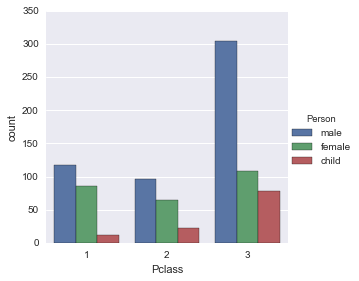

In [50]:
sns.factorplot("Pclass", kind ="count", data=titanicDataFrame, hue="Person") # .. to see it plotted again

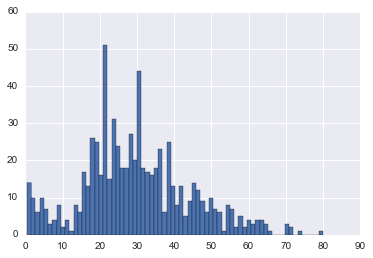

In [51]:
titanicDataFrame["Age"].hist(bins=70)

In [52]:
'''
The above uses Pandas to create a histogram to see a distribution of the ages to help get a 
clearer picture of the passenger demographics.
'''

'\nThe above uses Pandas to create a histogram to see a distribution of the ages to help get a \nclearer picture of the passenger demographics.\n'

In [54]:
titanicDataFrame["Age"].mean() # To find the mean age of the passengers

29.69911764705882

In [55]:
titanicDataFrame["Person"].value_counts()  # For an overall comparison of men, women, children

male      519
female    259
child     113
Name: Person, dtype: int64